![Amazon employee datataset](https://avatars.mds.yandex.net/get-bunker/56833/dba868860690e7fe8b68223bb3b749ed8a36fbce/orig)

> **Data Description**

    - The data consists of real historical data collected from 2010 & 2011.  Employees are manually allowed or denied access to resources over time. You must create an algorithm capable of learning from this historical data to predict approval/denial for an unseen set of employees. 

> **Column Descriptions**

| Column Name | Description |
|-------------|-------------|
| ACTION | ACTION is 1 if the resource was approved, 0 if the resource was not |
| RESOURCE | An ID for each resource |
| MGR_ID | The EMPLOYEE ID of the manager of the current EMPLOYEE ID record; an employee may have only one manager at a time |
| ROLE_ROLLUP_1 | Company role grouping category id 1 (e.g. US Engineering) |
| ROLE_ROLLUP_2 | Company role grouping category id 2 (e.g. US Retail) |
| ROLE_DEPTNAME | Company role department description (e.g. Retail) |
| ROLE_TITLE | Company role business title description (e.g. Senior Engineering Retail Manager) |
| ROLE_FAMILY_DESC | Company role family extended description (e.g. Retail Manager, Software Engineering) |
| ROLE_FAMILY | Company role family description (e.g. Retail Manager) |
| ROLE_CODE | Company role code; this code is unique to each role (e.g. Manager) |

In [9]:
#! pip install catboost

> CatBoost is a high-performance open source library for gradient boosting on decision trees. It is developed by Yandex researchers and engineers, and is used for search, recommendation systems, personal assistant, self-driving cars, weather prediction and many other tasks at Yandex and in other companies, including CERN, Cloudflare, Careem taxi. It is in open-source and can be used by anyone.

**Features**

    - *Great quality without parameter tuning*
        - Reduce time spent on parameter tuning, because CatBoost provides great results with default parameters
    - *Categorical features support*
        - Improve your training results with CatBoost that allows you to use non-numeric factors, instead of having to pre-process your data or spend time and effort turning it to numbers.
    - *Fast and scalable GPU version*
        - Train your model on a fast implementation of gradient-boosting algorithm for GPU. Use a multi-card configuration for large datasets.
    - *Improved accuracy*
        - Reduce overfitting when constructing your models with a novel gradient-boosting scheme.
    - *Fast prediction*
        - Apply your trained model quickly and efficiently even to latency-critical tasks using CatBoost's model applier

In [10]:
from catboost.datasets import amazon
train_df, test_df = amazon()
train_df.shape, test_df.shape

((32769, 10), (58921, 10))

In [11]:
train_df.apply(lambda x: len(x.unique()))

ACTION                 2
RESOURCE            7518
MGR_ID              4243
ROLE_ROLLUP_1        128
ROLE_ROLLUP_2        177
ROLE_DEPTNAME        449
ROLE_TITLE           343
ROLE_FAMILY_DESC    2358
ROLE_FAMILY           67
ROLE_CODE            343
dtype: int64

In [12]:
train_df['RESOURCE'].value_counts()

4675     839
79092    484
75078    409
25993    409
3853     404
        ... 
30849      1
98430      1
79977      1
16486      1
16376      1
Name: RESOURCE, Length: 7518, dtype: int64

In [13]:
train_df['ROLE_FAMILY'].value_counts()

290919    10980
118424     2690
19721      2636
117887     2400
292795     1318
          ...  
254395        3
130364        3
132725        2
161100        2
149353        2
Name: ROLE_FAMILY, Length: 67, dtype: int64

In [14]:
train_df['ACTION'].value_counts()

1    30872
0     1897
Name: ACTION, dtype: int64

**Visualisation of data**

<IPython.core.display.Javascript object>

c:\users\abhis\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<IPython.core.display.Javascript object>

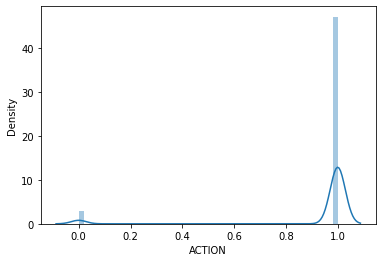

<IPython.core.display.Javascript object>

c:\users\abhis\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<IPython.core.display.Javascript object>

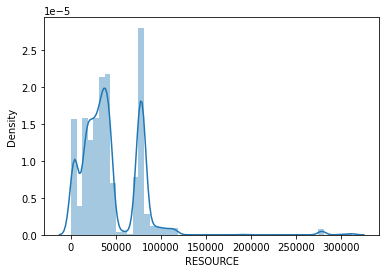

<IPython.core.display.Javascript object>

c:\users\abhis\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<IPython.core.display.Javascript object>

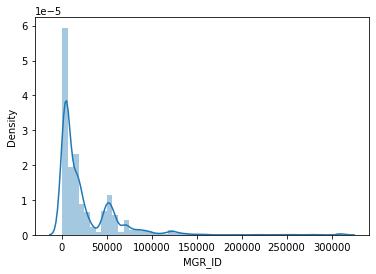

<IPython.core.display.Javascript object>

c:\users\abhis\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<IPython.core.display.Javascript object>

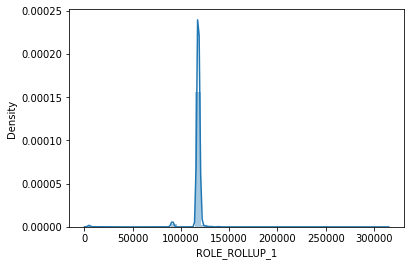

<IPython.core.display.Javascript object>

c:\users\abhis\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<IPython.core.display.Javascript object>

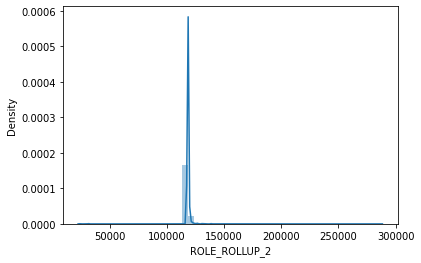

<IPython.core.display.Javascript object>

c:\users\abhis\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<IPython.core.display.Javascript object>

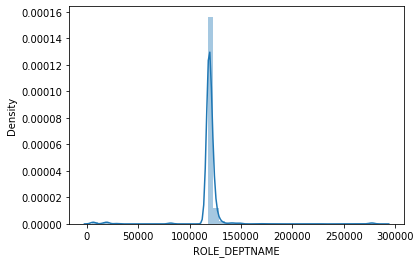

<IPython.core.display.Javascript object>

c:\users\abhis\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<IPython.core.display.Javascript object>

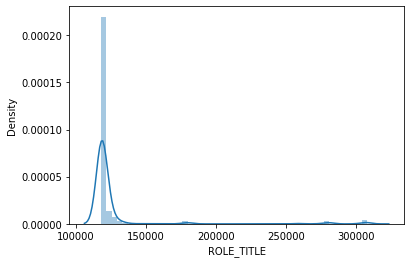

<IPython.core.display.Javascript object>

c:\users\abhis\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<IPython.core.display.Javascript object>

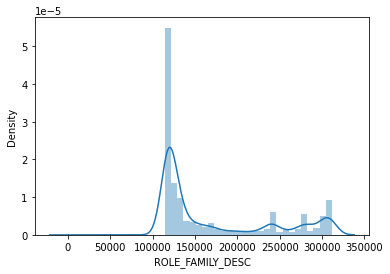

<IPython.core.display.Javascript object>

c:\users\abhis\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<IPython.core.display.Javascript object>

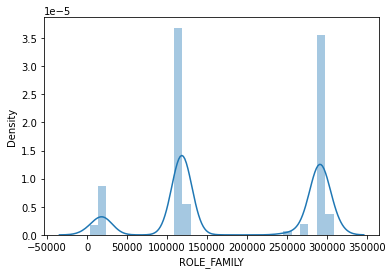

<IPython.core.display.Javascript object>

c:\users\abhis\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<IPython.core.display.Javascript object>

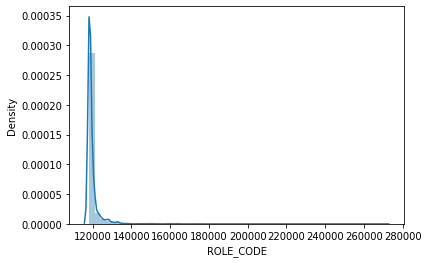

In [15]:
for i in train_df.describe().columns:
    sns.distplot(train_df[i].dropna())
    plt.show()

<IPython.core.display.Javascript object>

c:\users\abhis\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<IPython.core.display.Javascript object>

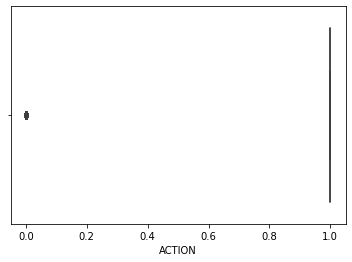

<IPython.core.display.Javascript object>

c:\users\abhis\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<IPython.core.display.Javascript object>

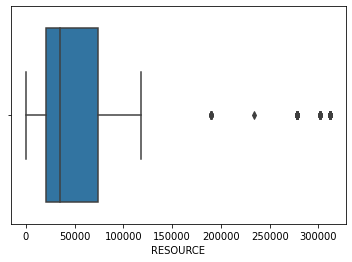

<IPython.core.display.Javascript object>

c:\users\abhis\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<IPython.core.display.Javascript object>

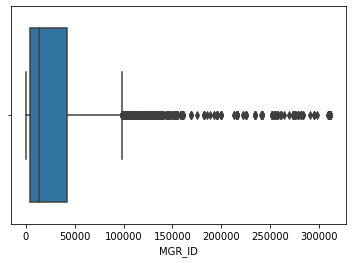

<IPython.core.display.Javascript object>

c:\users\abhis\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<IPython.core.display.Javascript object>

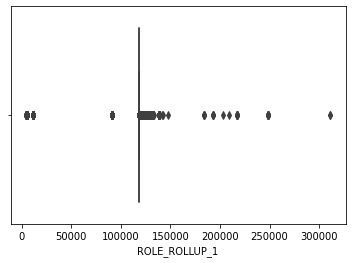

<IPython.core.display.Javascript object>

c:\users\abhis\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<IPython.core.display.Javascript object>

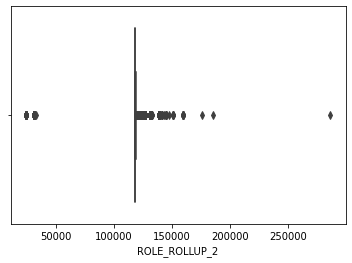

<IPython.core.display.Javascript object>

c:\users\abhis\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<IPython.core.display.Javascript object>

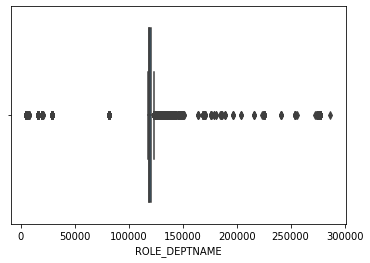

<IPython.core.display.Javascript object>

c:\users\abhis\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<IPython.core.display.Javascript object>

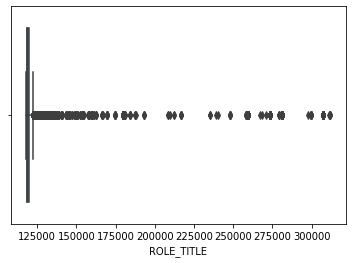

<IPython.core.display.Javascript object>

c:\users\abhis\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<IPython.core.display.Javascript object>

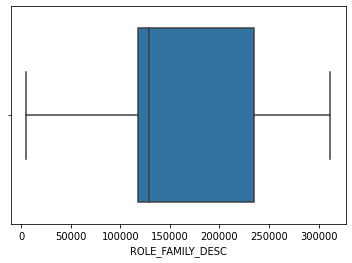

<IPython.core.display.Javascript object>

c:\users\abhis\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<IPython.core.display.Javascript object>

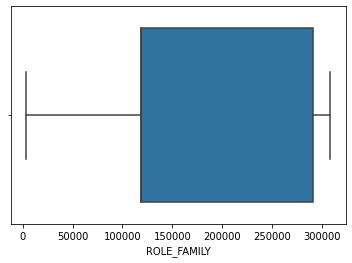

<IPython.core.display.Javascript object>

c:\users\abhis\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<IPython.core.display.Javascript object>

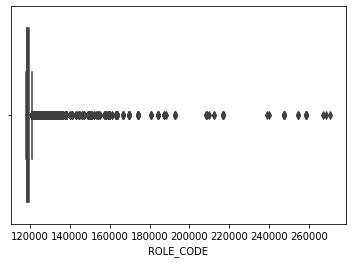

In [16]:
for i in train_df.describe().columns:
    sns.boxplot(train_df[i].dropna())
    plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<AxesSubplot:>

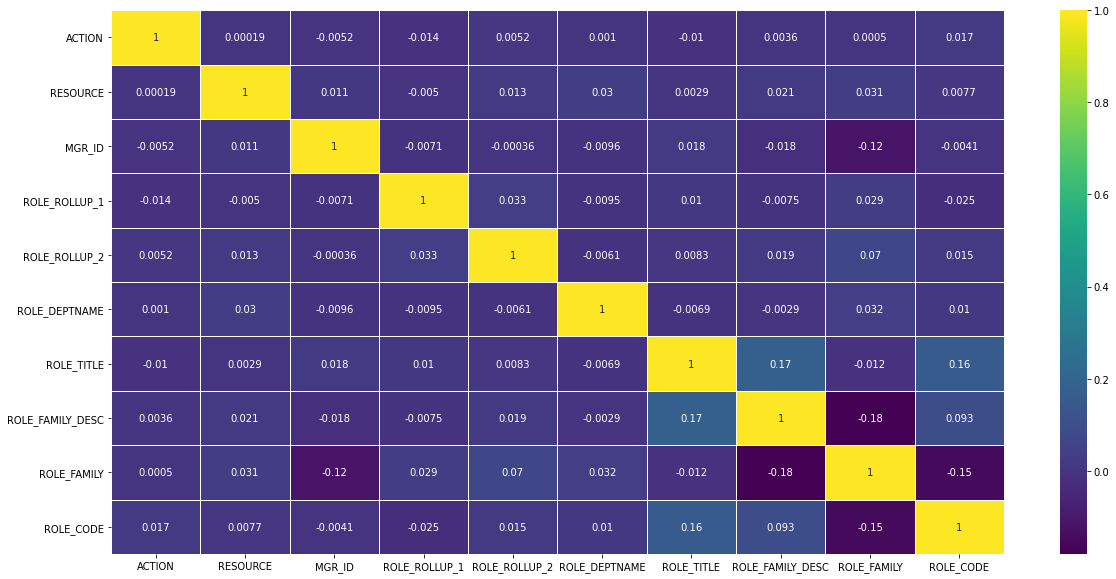

In [17]:
plt.figure(figsize = (20, 10))
sns.heatmap(train_df.corr(), annot = True, cmap = 'viridis', linewidth = 1)

**Model Building**

In [18]:
y = train_df['ACTION']
x = train_df.drop('ACTION', axis = 1)
x_test = test_df.drop('id', axis = 1)

In [19]:
from sklearn.model_selection import train_test_split
x_train, x_valid, y_train, y_valid = train_test_split(x, y, test_size = 0.25, random_state = 1)

In [20]:
from catboost import CatBoostClassifier

In [21]:
%%time
params = {'loss_function': 'Logloss',
          'eval_metric':'AUC:hints=skip_train~false',
          'verbose': 200,
          'random_seed': 1}
catmodel_1 = CatBoostClassifier(**params)
catmodel_1.fit(x_train, y_train, eval_set = (x_valid, y_valid), use_best_model = True)

Learning rate set to 0.069882
0:	learn: 0.5389210	test: 0.5400959	best: 0.5400959 (0)	total: 191ms	remaining: 3m 10s
200:	learn: 0.8792570	test: 0.8016667	best: 0.8017826 (196)	total: 6.1s	remaining: 24.2s
400:	learn: 0.9225218	test: 0.8234442	best: 0.8234442 (400)	total: 12.1s	remaining: 18s
600:	learn: 0.9441294	test: 0.8323016	best: 0.8323806 (596)	total: 18s	remaining: 12s
800:	learn: 0.9599636	test: 0.8358281	best: 0.8361190 (795)	total: 24s	remaining: 5.95s
999:	learn: 0.9711849	test: 0.8391131	best: 0.8393621 (997)	total: 29.8s	remaining: 0us

bestTest = 0.8393620826
bestIteration = 997

Shrink model to first 998 iterations.
Wall time: 30.9 s


In [22]:
x.head()

,RESOURCE,MGR_ID,ROLE_ROLLUP_1,ROLE_ROLLUP_2,ROLE_DEPTNAME,ROLE_TITLE,ROLE_FAMILY_DESC,ROLE_FAMILY,ROLE_CODE
0,39353,85475,117961,118300,123472,117905,117906,290919,117908
1,17183,1540,117961,118343,123125,118536,118536,308574,118539
2,36724,14457,118219,118220,117884,117879,267952,19721,117880
3,36135,5396,117961,118343,119993,118321,240983,290919,118322
4,42680,5905,117929,117930,119569,119323,123932,19793,119325


In [23]:
categorical_features = list(range(x.shape[1]))
categorical_features

[0, 1, 2, 3, 4, 5, 6, 7, 8]

In [24]:
%%time
params = {'loss_function': 'Logloss',
          'eval_metric':'AUC:hints=skip_train~false',
          'cat_features': categorical_features,
          'verbose': 200,
          'random_seed': 1}
catmodel_2 = CatBoostClassifier(**params)
catmodel_2.fit(x_train, y_train, eval_set = (x_valid, y_valid), use_best_model = True)

Learning rate set to 0.069882
0:	learn: 0.5616960	test: 0.5637606	best: 0.5637606 (0)	total: 119ms	remaining: 1m 58s
200:	learn: 0.8697068	test: 0.8955617	best: 0.8955872 (198)	total: 26.3s	remaining: 1m 44s
400:	learn: 0.8896195	test: 0.8973364	best: 0.8979162 (365)	total: 56.8s	remaining: 1m 24s
600:	learn: 0.9093650	test: 0.8972380	best: 0.8979162 (365)	total: 1m 27s	remaining: 58.4s
800:	learn: 0.9252708	test: 0.8958290	best: 0.8979581 (706)	total: 1m 54s	remaining: 28.5s
999:	learn: 0.9391837	test: 0.8933696	best: 0.8979581 (706)	total: 2m 22s	remaining: 0us

bestTest = 0.8979580831
bestIteration = 706

Shrink model to first 707 iterations.
Wall time: 2min 23s
